In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# used for scaling data set
from sklearn import preprocessing

In [0]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [0]:
# used for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# Data set split
from sklearn.model_selection import train_test_split

In [0]:
# PCA
from sklearn.decomposition import PCA

In [0]:
# Logistic
from sklearn.linear_model import LogisticRegression

In [0]:
# performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [0]:
from matplotlib import pyplot

In [10]:
# to handle imbalanced data set
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from math import sqrt

In [0]:
from xgboost import XGBClassifier

In [13]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id = '1grwIZR_LdcdyirULSoJ_VFhtuPpv00AB'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [19]:
data.shape

(284807, 31)

In [20]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

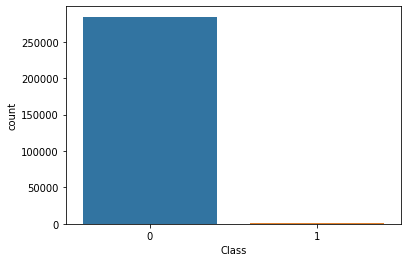

In [24]:
sns.countplot("Class", data=data)

In [0]:
X_data = data.iloc[:,0:30]
y_data = data.iloc[:,-1]

#### Standard scaler

In [0]:
standard_scaler = preprocessing.StandardScaler()
X_standard_scaled_df = standard_scaler.fit_transform(X_data)

In [27]:
X_standard_scaled_df

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [0]:
X_standard_scaled_df = pd.DataFrame(data=X_standard_scaled_df[:,:], columns=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])  # 1st row as the column names

In [29]:
X_standard_scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [0]:
# Make an instance of the Model
pca = PCA(10)

pca_selected = pca.fit_transform(X_standard_scaled_df)
# pca_selected_df = pca.fit(selected_df)

In [31]:
print(pca_selected.shape)

(284807, 10)


In [32]:
print(pca.n_components_)

10


In [0]:
pca_selected_df = pd.DataFrame(data=pca_selected[:,:])

In [34]:
pca_selected_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.428463,2.525676,-0.042236,0.403509,0.321529,0.033073,0.218662,-0.275020,-1.134819,-0.083847
1,-0.390666,2.098128,-0.630678,0.357972,0.235349,0.364158,-0.289659,0.742988,0.517906,0.401811
2,1.875630,2.621824,-0.901596,0.913495,2.105177,-0.733067,-1.241583,0.122046,-0.095901,1.065528
3,0.322884,1.758169,-0.200081,0.441215,0.436001,-0.422455,-2.244472,0.406584,0.408728,1.158620
4,-0.016402,1.545026,0.660007,0.109207,-0.537017,0.500945,-0.572621,0.208075,-1.650192,0.354376


In [0]:
ready_data = pca_selected_df.join(y_data)

In [0]:
data_class_0 = ready_data[ready_data['Class']==0]

In [37]:
data_class_0.shape

(284315, 11)

In [0]:
data_class_1 = ready_data[ready_data['Class']==1]

In [39]:
data_class_1.shape

(492, 11)

In [40]:
data_class_0.head()

,0,1,2,3,4,5,6,7,8,9,Class
0,0.428463,2.525676,-0.042236,0.403509,0.321529,0.033073,0.218662,-0.275020,-1.134819,-0.083847,0
1,-0.390666,2.098128,-0.630678,0.357972,0.235349,0.364158,-0.289659,0.742988,0.517906,0.401811,0
2,1.875630,2.621824,-0.901596,0.913495,2.105177,-0.733067,-1.241583,0.122046,-0.095901,1.065528,0
3,0.322884,1.758169,-0.200081,0.441215,0.436001,-0.422455,-2.244472,0.406584,0.408728,1.158620,0
4,-0.016402,1.545026,0.660007,0.109207,-0.537017,0.500945,-0.572621,0.208075,-1.650192,0.354376,0


In [41]:
data_class_1.head()

,0,1,2,3,4,5,6,7,8,9,Class
541,-0.403217,2.055193,2.131583,0.750778,-1.500823,0.177311,-0.909122,2.504090,-0.896430,-1.344431,1
623,2.618693,1.882734,0.753224,0.981496,-0.997148,-1.335564,0.826907,0.187562,-0.944658,-0.159386,1
4920,0.894179,2.320948,3.446886,-1.691832,-0.586639,1.344727,-2.028888,2.620211,-0.639193,-1.863153,1
6108,0.039353,2.321165,7.180926,-2.044410,-2.643560,0.615854,-8.080242,7.782992,-1.683614,-5.788035,1
6329,-0.434380,1.392978,4.229101,0.401744,-1.381587,-1.765762,5.791552,4.541028,0.746898,5.798704,1


In [0]:
# Since the number of fraud transactions are too little in compare to non-fraud, 
# I make sure that they are distributed equally in both train and test set

X_0 = data_class_0.iloc[:,0:-1]  #independent columns
y_0 = data_class_0.iloc[:,-1]    #target column i.e Class

X_1 = data_class_1.iloc[:,0:-1]  #independent columns
y_1 = data_class_1.iloc[:,-1]    #target column i.e Class

# def train_gen():
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.33, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)



# train_data = pd.merge(X_train, y_train, left_index=True, right_index=True)
# test_data = pd.concat([X_test,y_test], axis=1)

In [43]:
X_train_0.head()

,0,1,2,3,4,5,6,7,8,9
129701,-0.381160,0.988145,0.053951,0.663914,0.644456,0.085647,0.900588,0.323997,0.207651,0.063192
31479,-0.379724,1.082874,-0.997423,-0.025889,-0.946744,-0.208745,0.937720,1.036591,0.312120,1.020555
71978,-0.656080,1.001884,-0.386370,0.440748,1.644407,-2.150618,0.618643,-1.025495,0.330627,-0.804778
146747,0.182940,0.743746,0.550838,0.679624,0.337597,-0.732847,0.030791,-0.352328,-0.223124,-0.893274
26850,-0.269121,0.074659,0.763239,1.085497,0.569854,0.578853,-0.737385,0.868664,-0.435734,-1.396944


In [0]:
X_train = pd.concat([X_train_0, X_train_1])
y_train = pd.concat([y_train_0, y_train_1])
X_test = pd.concat([X_test_0 , X_test_1])
y_test = pd.concat([y_test_0 , y_test_1])

In [45]:
X_train.shape

(190820, 10)

In [46]:
y_train.shape

(190820,)

In [47]:
X_test.shape

(93987, 10)

In [48]:
y_test.shape

(93987,)

### Becasue the dataset is toooooooo imbalanced, we use technics
- undersampling
- oversampling

In [0]:
# pip install imbalanced-learn

## Balancing the imbalanced dataset

### SMOTE

In [50]:
>>> print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 190491, 1: 329})


In [51]:
>>> sm = SMOTE(random_state=42)
>>> X_res, y_res = sm.fit_resample(X_train, y_train)
>>> print('Resampled dataset shape %s' % Counter(y_res))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 190491, 1: 190491})


#### Logistic Regression

In [0]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression()

In [0]:
logit_model = logisticRegr.fit(X_train, y_train)

In [0]:
logit_predict = logisticRegr.predict(X_test)

In [55]:
logit_predict

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
logisticRegr.score(X_test, y_test)

0.9989679423750093

In [57]:
confusion_matrix(y_test, logit_predict)

array([[93813,    11],
       [   86,    77]])

In [58]:
accuracy_score(y_test, logit_predict)

0.9989679423750093

In [59]:
print(classification_report(y_test, logit_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93824
           1       0.88      0.47      0.61       163

    accuracy                           1.00     93987
   macro avg       0.94      0.74      0.81     93987
weighted avg       1.00      1.00      1.00     93987



### Neural Network - KERAS

In [0]:
# Initialising the ANN
classifier = keras.Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(
    keras.layers.Dense(units =10 , kernel_initializer = 'uniform', activation = 'relu', input_dim =10))

In [0]:
# Adding the output layer
classifier.add(
    keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [64]:
X_train.values

array([[-3.81160278e-01,  9.88144610e-01,  5.39511801e-02, ...,
         3.23996644e-01,  2.07651178e-01,  6.31915426e-02],
       [-3.79724481e-01,  1.08287358e+00, -9.97423379e-01, ...,
         1.03659137e+00,  3.12119960e-01,  1.02055530e+00],
       [-6.56079629e-01,  1.00188438e+00, -3.86369584e-01, ...,
        -1.02549491e+00,  3.30627250e-01, -8.04777550e-01],
       ...,
       [ 8.39843587e-03,  1.07375059e-01,  9.20558212e+00, ...,
         6.34011784e+00, -3.32395871e+00, -4.02543436e+00],
       [-2.10081415e-01, -1.79017981e+00,  1.52861835e+00, ...,
         5.32301486e+00, -2.61631299e+00, -2.10677871e+00],
       [-1.61771679e-01,  1.24294969e+00,  6.84566150e+00, ...,
         3.10140268e+00, -2.02983774e+00, -3.16779060e+00]])

In [65]:
# Fitting the ANN to the Training set
model = classifier.fit(X_train.values, y_train.values, batch_size = 128, epochs = 5)

Train on 190820 samples
Epoch 1/5
190820/190820 [==============================] - 3s 16us/sample - loss: 0.1132 - accuracy: 0.9969
Epoch 2/5
190820/190820 [==============================] - 2s 13us/sample - loss: 0.0072 - accuracy: 0.9988
Epoch 3/5
190820/190820 [==============================] - 2s 13us/sample - loss: 0.0054 - accuracy: 0.9990
Epoch 4/5
190820/190820 [==============================] - 2s 13us/sample - loss: 0.0048 - accuracy: 0.9991
Epoch 5/5
190820/190820 [==============================] - 2s 13us/sample - loss: 0.0045 - accuracy: 0.9991


In [66]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

93987/93987 [==============================] - 3s 30us/sample - loss: 0.0042 - accuracy: 0.9992


[0.0042215044572121805, 0.99915946]

In [67]:
#Let's see how our model performed
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93824
           1       0.90      0.58      0.71       163

    accuracy                           1.00     93987
   macro avg       0.95      0.79      0.85     93987
weighted avg       1.00      1.00      1.00     93987



Test Data Accuracy: 0.9992


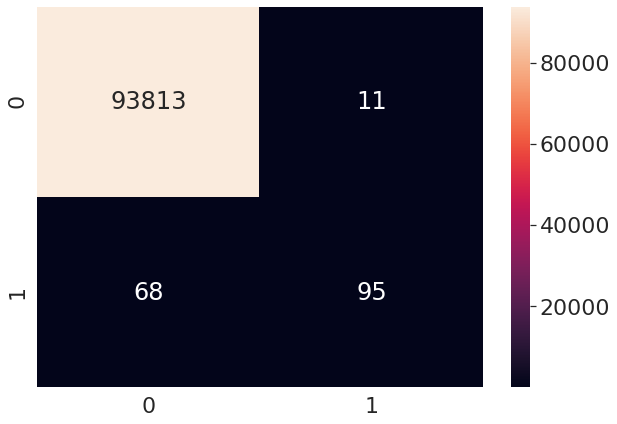

In [68]:
## EXTRA: Confusion Matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

No Fraud: ROC AUC=0.500
ROC AUC: ROC AUC=0.948


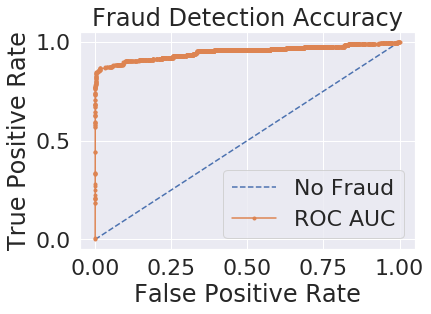

In [71]:
# generate a no fraud prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Fraud: ROC AUC=%.3f' % (ns_auc))
print('ROC AUC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Fraud')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC AUC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Fraud Detection Accuracy')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Now using greater number of layers (32)

In [0]:
# Initialising the ANN
classifier2 = keras.Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier2.add(keras.layers.Dense(units =32 , kernel_initializer = 'uniform', activation = 'relu', input_dim =10))

In [0]:
# Adding the output layer
classifier2.add(keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [76]:
# Fitting the ANN to the Training set
model2 = classifier2.fit(X_train.values, y_train.values, batch_size = 128, epochs = 5)

Train on 190820 samples
Epoch 1/5
190820/190820 [==============================] - 3s 13us/sample - loss: 0.0671 - accuracy: 0.9975
Epoch 2/5
190820/190820 [==============================] - 2s 11us/sample - loss: 0.0053 - accuracy: 0.9990
Epoch 3/5
190820/190820 [==============================] - 2s 11us/sample - loss: 0.0046 - accuracy: 0.9991
Epoch 4/5
190820/190820 [==============================] - 2s 11us/sample - loss: 0.0043 - accuracy: 0.9992
Epoch 5/5
190820/190820 [==============================] - 2s 11us/sample - loss: 0.0041 - accuracy: 0.9992


In [77]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
score2 = classifier2.evaluate(X_test, y_test)
score2

93987/93987 [==============================] - 3s 31us/sample - loss: 0.0041 - accuracy: 0.9992


[0.004058713889813237, 0.9992127]

In [78]:
#Let's see how our model performed
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93824
           1       0.89      0.63      0.73       163

    accuracy                           1.00     93987
   macro avg       0.94      0.81      0.87     93987
weighted avg       1.00      1.00      1.00     93987



Test Data Accuracy: 0.9992


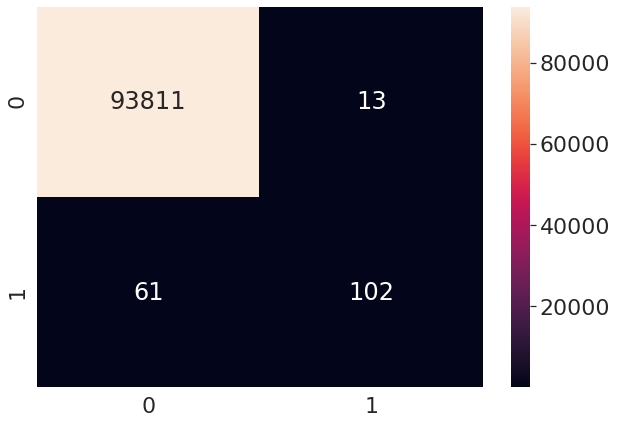

In [79]:
## EXTRA: Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2) # rows = truth, cols = prediction
df_cm2 = pd.DataFrame(cm2, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=2)
sn.heatmap(df_cm2, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred2))

No Fraud: ROC AUC=0.500
ROC AUC: ROC AUC=0.956


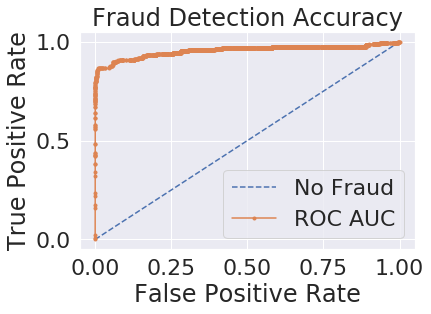

In [80]:
# generate a no fraud prediction (majority class)
ns_probs2 = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs2 = classifier2.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs2 = lr_probs2[:, 0]

# calculate scores
ns_auc2 = roc_auc_score(y_test, ns_probs2)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# summarize scores
print('No Fraud: ROC AUC=%.3f' % (ns_auc2))
print('ROC AUC: ROC AUC=%.3f' % (lr_auc2))

# calculate roc curves
ns_fpr2, ns_tpr2, _ = roc_curve(y_test, ns_probs2)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
# plot the roc curve for the model
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', label='No Fraud')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='ROC AUC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Fraud Detection Accuracy')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

XGBoost

In [0]:
XGB_classifier = XGBClassifier(n_estimators=10000, learning_rate=.01, maximize=True)
XGB_classifier.fit(X_train,y_train, eval_metric = 'aucpr')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3, maximize=True,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
XGB_classifier_predict_smote = XGB_classifier.predict(X_test)

In [0]:
XGB_classifier_predict_smote

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
print(XGB_classifier.score(X_train,y_train))
print(np.sqrt(mean_squared_error(XGB_classifier_predict_smote,y_test)))

1.0
0.022598870056497175


In [0]:
accuracy_score(y_test,XGB_classifier_predict_smote)

0.9994892910721696

In [0]:
classification_report(y_test,XGB_classifier_predict_smote)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     93824\n           1       0.91      0.79      0.84       163\n\n    accuracy                           1.00     93987\n   macro avg       0.95      0.89      0.92     93987\nweighted avg       1.00      1.00      1.00     93987\n'

### 10 percent learning rate

In [0]:
XGB_classifier = XGBClassifier(n_estimators=10000, learning_rate=.1, maximize=True)
XGB_classifier.fit(X_train,y_train, eval_metric = 'aucpr')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3, maximize=True,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
XGB_classifier_predict_smote = XGB_classifier.predict(X_test)

In [0]:
XGB_classifier_predict_smote

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
print(XGB_classifier.score(X_train,y_train))
print(np.sqrt(mean_squared_error(XGB_classifier_predict_smote,y_test)))

1.0
0.02283306149337503


In [0]:
accuracy_score(y_test,XGB_classifier_predict_smote)

0.9994786513028397

In [0]:
classification_report(y_test,XGB_classifier_predict_smote)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     93824\n           1       0.90      0.79      0.84       163\n\n    accuracy                           1.00     93987\n   macro avg       0.95      0.90      0.92     93987\nweighted avg       1.00      1.00      1.00     93987\n'